In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)

In [ ]:
X = lfw_people.data
y = lfw_people.target

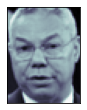

In [ ]:
# displaying the fourth image
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(3, 5, 1, xticks=[], yticks=[])
ax.imshow(lfw_people.images[3], cmap=plt.cm.bone)

In [ ]:
X_meaned = X - np.mean(X , axis = 0) # centering the data

In [ ]:
u, s, v = np.linalg.svd(X_meaned) # performing pca using svd

Compute the 50 top principal components and print them

In [ ]:
for i in range(50):
  print(v.T[:, i])

[-0.00750877 -0.00812394 -0.00893856 ... -0.01415705 -0.01228611
 -0.01032105]
[-0.01736775 -0.01625778 -0.01584153 ...  0.03365867  0.03306131
  0.03161871]
[0.02008713 0.01817848 0.01725674 ... 0.03870662 0.03452758 0.03226309]
[0.03030667 0.03257753 0.03441757 ... 0.0316022  0.02888925 0.02280479]
[ 0.00905503  0.00954557  0.01001607 ... -0.09149976 -0.0837678
 -0.0732807 ]
[ 0.00439566  0.00896313  0.01440755 ...  0.01826183  0.00515619
 -0.00592113]
[ 0.02233808  0.02455116  0.02775332 ... -0.09193995 -0.10634656
 -0.10820933]
[ 0.02019962  0.02099339  0.01817838 ... -0.02523355  0.00015038
  0.0186326 ]
[-0.0365059  -0.03614231 -0.03470054 ... -0.01690972 -0.0178256
 -0.01637944]
[0.00113123 0.00148436 0.00233183 ... 0.01980455 0.02064092 0.02021225]
[0.02752035 0.02982087 0.02943227 ... 0.08497517 0.07750663 0.06200352]
[ 0.06874837  0.0709137   0.07061385 ... -0.0146252  -0.02159968
 -0.02630339]
[0.03439236 0.03717149 0.03916177 ... 0.0689916  0.07517613 0.0711688 ]
[-0.026116

What are the values of the associated 50 attributes of the fourth image in the dataset?

In [ ]:
num_components = 50
X_transformed = X_meaned @ v[:num_components,:].T

In [ ]:
print(X_transformed[3])

[ 0.9314178   1.0077627  -1.5906525   0.27616745  0.197115    2.4422057
  1.1770754   0.5719874  -1.8186102  -0.32588747 -2.9581072   0.45076966
  1.5857271   2.7838712  -0.6485479  -0.35291642 -1.3016062  -1.8617456
  2.4138107   1.6074783   1.0171655  -1.5304079  -0.891899    1.8119452
  0.45341328 -1.0470015  -0.9808331   0.5842683  -0.17363712 -0.4611924
 -0.24523473 -0.23812538  1.1931627  -0.774081   -0.41575313  0.73469234
  0.47560453 -0.5409514   0.43437424  0.2758677  -0.3867248  -0.631353
 -0.03142709 -0.06250559 -0.18105866 -0.0190046   0.8235791   0.2025305
  0.39007086  0.70145184]


Project the fourth face in the dataset onto the first 50 principal components.

(<matplotlib.image.AxesImage at 0x7fba7ad565e0>,
 Text(0.5, 1.0, 'Image in new face space'))

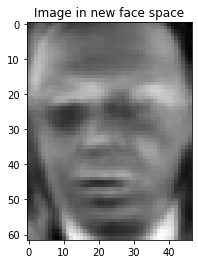

In [ ]:
# projecting and displaying the projected image
_, h, w = lfw_people.images.shape
reconst0 = X_transformed[3] @ v[: num_components, :]
plt.imshow(reconst0.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')

Project the fourth face with first 50 principal components back into the original image
space, and then display it.

In [ ]:
# projecting to original image space and displaying the image
W5 = v.T[:, :num_components]
X_prime = np.dot(X_transformed,W5.T)  + np.mean(X, axis=0)

In [ ]:
print(X_prime.shape)

(1288, 2914)


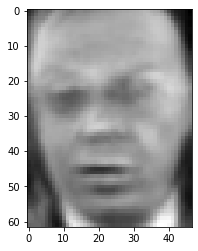

In [ ]:
plt.imshow(X_prime[3].reshape(h, w), cmap = plt.cm.gray)